In [ ]:
# Problem Statement & Objective
## Problem Statement

Banks run marketing campaigns to convince customers to subscribe to a term deposit. However, contacting every customer is costly and inefficient.

## Objective

Build a machine learning classification model to predict whether a customer will subscribe to a term deposit (yes or no), based on customer and campaign attributes.

In [ ]:
# Dataset Description & Loading

## Dataset
### Name: 
Bank Marketing Dataset

### Source:
UCI Machine Learning Repository

### Target Variable: y

yes → subscribed

no → not subscribed

In [1]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import shap


In [4]:
# Load dataset
df = pd.read_csv("bank-full.csv", sep=';')

# Display first 5 rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,durations,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Data Exploration

## Dataset shape
df.shape

(45210, 17)

In [6]:
## Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   marital    45210 non-null  object
 3   education  45210 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    45210 non-null  object
 9   day        45210 non-null  int64 
 10  month      45210 non-null  object
 11  durations  45210 non-null  int64 
 12  campaign   45210 non-null  int64 
 13  pdays      45210 non-null  int64 
 14  previous   45210 non-null  int64 
 15  poutcome   45210 non-null  object
 16  y          45210 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
## Check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
durations    0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# Observation:

-No missing values
-Mix of categorical and numerical features

In [8]:
# Data Cleaning and preprocessing

## Encode Target Varaible
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])


In [9]:
df['y'].value_counts()


y
0    39921
1     5289
Name: count, dtype: int64

In [13]:
## Encode Categorical Featurs

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [14]:
# Data trimming

df_small = df.sample(n=10000, random_state=42)
df_small.shape

(10000, 17)

In [15]:
# Feature-Target Split
X = df_small.drop('y', axis=1)
y = df_small['y']



In [16]:
# Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
#Verify both classes exist
y_train.value_counts()

y
0    7034
1     966
Name: count, dtype: int64

In [18]:
# Feature Scaling (For Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

In [21]:
## Evaluation
print("F1 Score:", f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


F1 Score: 0.28938906752411575
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1758
           1       0.65      0.19      0.29       242

    accuracy                           0.89      2000
   macro avg       0.78      0.59      0.61      2000
weighted avg       0.87      0.89      0.86      2000



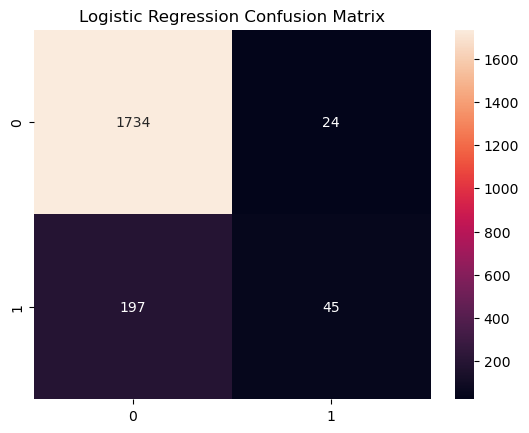

In [22]:
## Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

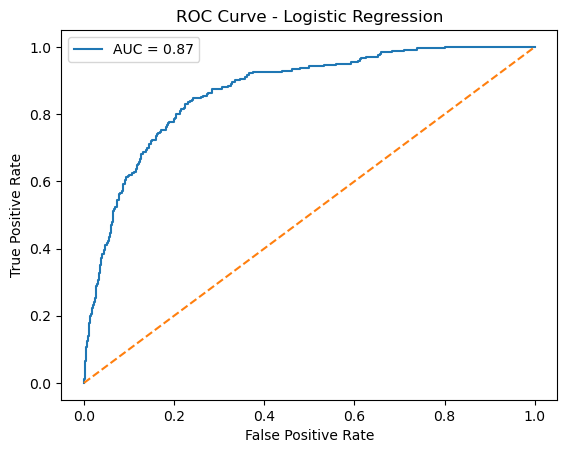

In [23]:
## ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [24]:
# Model 2: Random Forest (Optimized)
rf = RandomForestClassifier(
    n_estimators=30,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [25]:
## Evaluation
print("F1 Score:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

F1 Score: 0.33962264150943394
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1758
           1       0.71      0.22      0.34       242

    accuracy                           0.90      2000
   macro avg       0.81      0.61      0.64      2000
weighted avg       0.88      0.90      0.87      2000



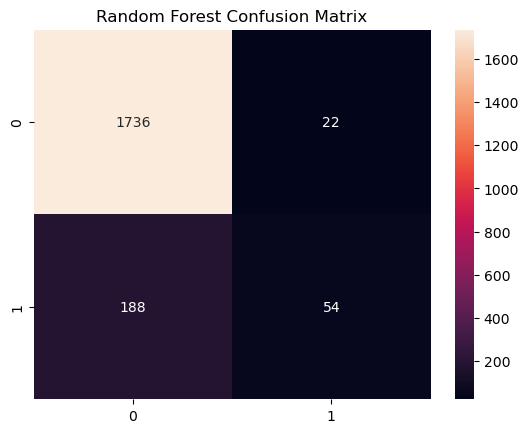

In [26]:
## Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

Explanation for Sample 0:


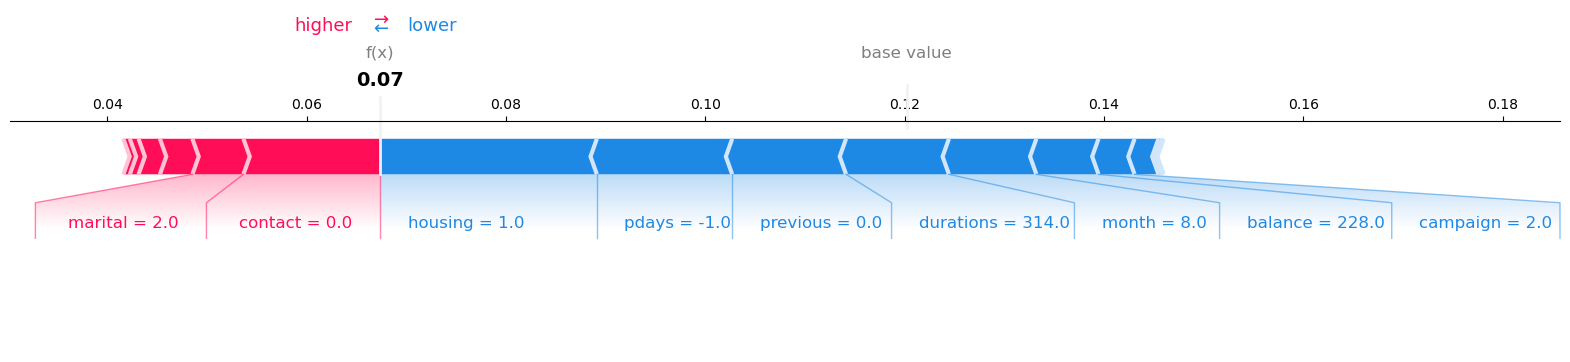

Explanation for Sample 1:


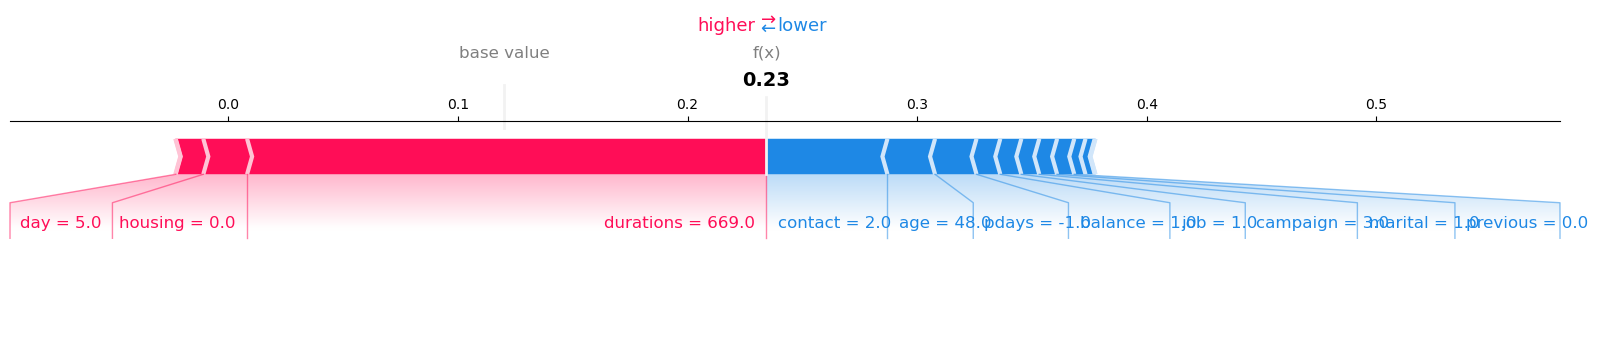

Explanation for Sample 2:


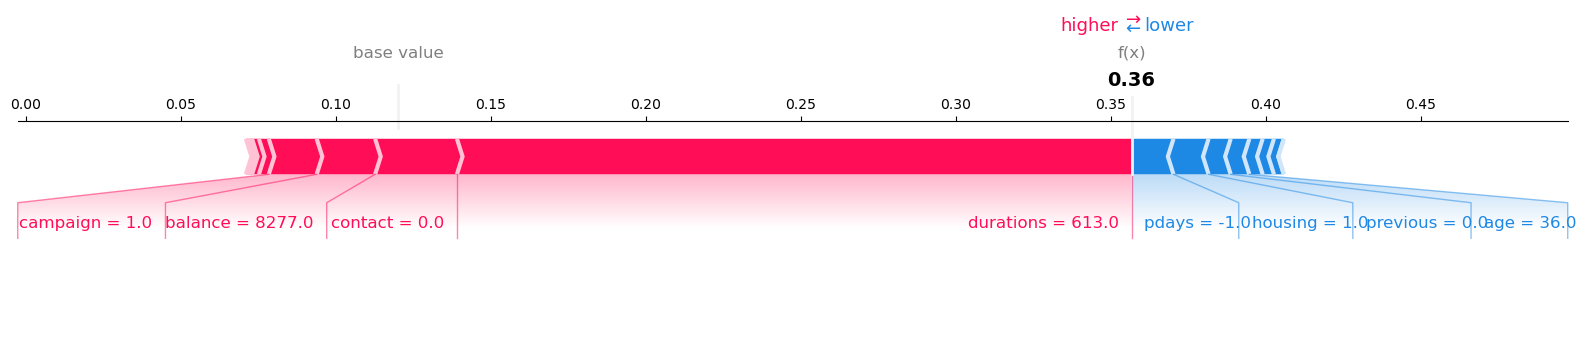

Explanation for Sample 3:


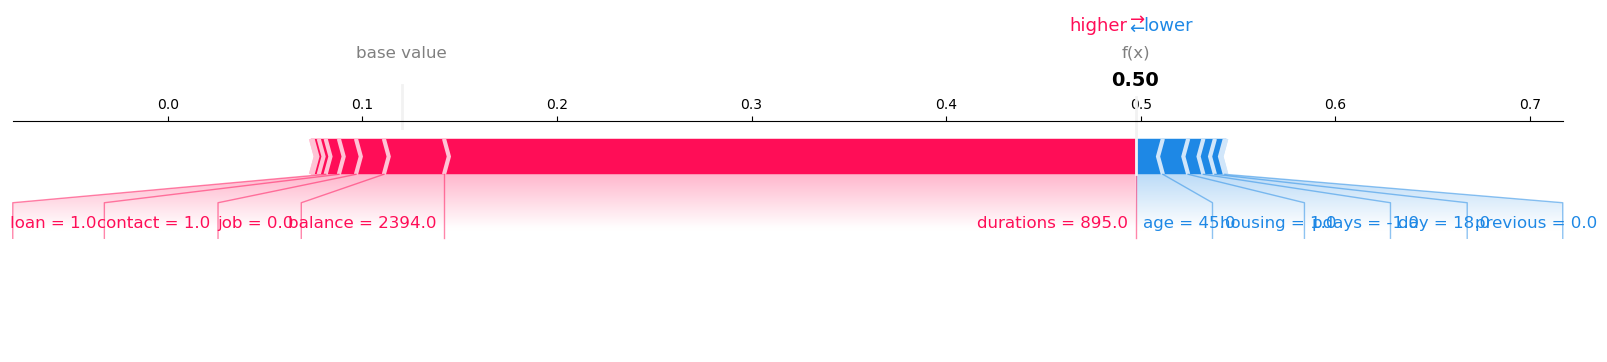

Explanation for Sample 4:


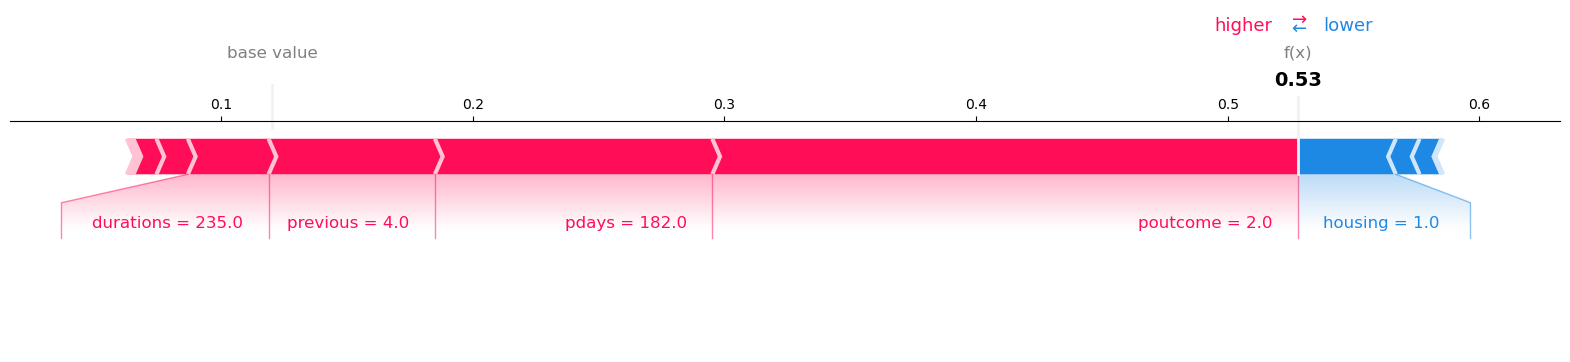

In [29]:
# Model Explainability using SHAP
## Explain only 5 predictions
X_test_sample = X_test.iloc[:5]

# Using the modern SHAP API which is more robust
explainer = shap.TreeExplainer(rf)
shap_values = explainer(X_test_sample)

# For binary classification, shap_values has two outputs (class 0 and 1).
# We take index [:, :, 1] to get values for the positive class (y=1).
for i in range(5):
    print(f"Explanation for Sample {i}:")
    shap.plots.force(
        shap_values[i, :, 1], # Explaining the 'yes' prediction
        matplotlib=True
    )

In [ ]:
# Conclusion:
In this project, Logistic Regression and Random Forest models were developed to predict customer subscription to term deposits.
Due to computational constraints, a representative subset of the dataset was used.
Random Forest showed stronger predictive performance, while SHAP explanations provided transparency by highlighting feature contributions for individual predictions.
This approach helps banks optimize marketing strategies while maintaining fairness and accountability.

# Key Findings:

-Random Forest performed better than Logistic Regression
-Features like duration, campaign, and previous strongly influence decisions
-SHAP provides clear explainability for individual predictions